In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()  # Display information about the DataFrame
df.head()  # Display the first few rows of the DataFrame
df.describe()  # Display summary statistics of the DataFrame
# Display the first few rows of the DataFrame   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [15]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

df['target']=(df['popularity'] == 70).astype(int)

df_cleaned = df.dropna(subset=features + ['target'])

X = df_cleaned[features]
y = df_cleaned['target']

In [16]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
X_scaled = StandardScaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
import torch
from torch.utils.data import DataLoader, Dataset

class MusicDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = MusicDataset(X_train, y_train)
test_dataset = MusicDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)    

In [30]:
print(X_train.shape, y_train.shape)

(136522, 9) (136522,)


In [42]:
import torch.nn as nn
import torch.optim as optim


class HitPredictor(nn.Module):
    def __init__(self, input_dim):
        super(HitPredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout de 30% dos neurónios
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)


# Cria a rede
model = HitPredictor(len(features))

In [44]:
import torch.optim as optim

model = HitPredictor(len(features))
criterion = nn.BCELoss()

# Otimizador com L2 regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.00005, weight_decay=1e-4)

Epoch 5/30, Loss: 0.0317
Epoch 10/30, Loss: 0.0306
Epoch 15/30, Loss: 0.0298
Epoch 20/30, Loss: 0.0288
Epoch 25/30, Loss: 0.0281
Epoch 30/30, Loss: 0.0282


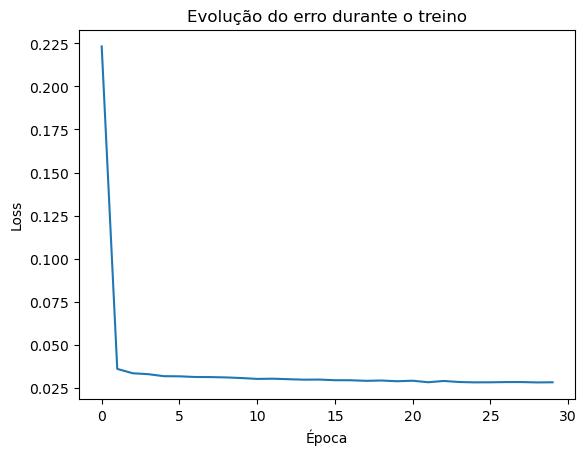

In [45]:
# ...existing code...
import matplotlib.pyplot as plt

losses = []

num_epochs = 30  

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.view(-1, 1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Plotando o erro
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Evolução do erro durante o treino')
plt.show()
# ...existing code...

In [41]:
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_batch = y_batch.view(-1, 1)  # Corrige o shape do target para (batch_size, 1)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item() * y_batch.size(0)  # Soma ponderada pelo batch size
        
        predicted = (outputs >= 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

# Média de loss no teste
test_loss /= total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Loss: 0.0254
Test Accuracy: 99.60%


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Precisamos de listas de rótulos verdadeiros e predições
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_batch = y_batch.view(-1, 1)
        predicted = (outputs >= 0.5).float()
        
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Converte para arrays (1D)
import numpy as np
y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
print("Matriz de confusão:")
print(cm)


Matriz de confusão:
[[33995     0]
 [  136     0]]


In [37]:
# Relatório com precisão, recall e F1-score
report = classification_report(y_true, y_pred)
print("Relatório de classificação:")
print(report)


Relatório de classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33995
         1.0       0.00      0.00      0.00       136

    accuracy                           1.00     34131
   macro avg       0.50      0.50      0.50     34131
weighted avg       0.99      1.00      0.99     34131



/opt/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(169732), np.int64(1): np.int64(750)}
